In [1]:
%matplotlib inline
from spectral_gap import *
import numpy as np
import scipy as scipy
import matplotlib.pyplot as plt

# Tensor scaling

Scale 3x3x3 unit tensor to certain non-uniform marginals:

In [ ]:
shape = [3, 3, 3]
targets = [(.5, .25, .25), (.4, .3, .3), (.7, .2, .1)]

res = scale(unit_tensor(3, 3), targets, eps=1e-4)
res

We can also access the scaling matrices and the final scaled state:

In [ ]:
print(res.gs[0], "\n")
print(res.gs[1], "\n")
print(res.gs[2])

Let's now check that the W tensor *cannot* be scaled to uniform marginals:

In [ ]:
shape = [2, 2, 2, 2]
W = np.zeros(shape)
W[1, 0, 0, 0] = W[0, 1, 0, 0] = W[0, 0, 1, 0] = W[0, 0, 0, 1] = .5
targets = [(.5, .5)] * 4

scale(W, targets, eps=1e-4, max_iterations=1000)

To see more clearly what is going on, we can set the `verbose` flag:

In [ ]:
res = scale(W, targets, eps=1e-4, max_iterations=10, verbose=True)

We see that at each point in the algorithm, one of the marginals has Frobenius distance $\approx 0.59$ to being uniform. Indeed, we know that the entanglement polytope of the W tensor does not include the point corresponding to uniform marginals -- see [here](https://www.entanglement-polytopes.org/four_qubits) for an interactive visualization!

# Tuples of matrices and tensors

We can just as well only prescribe the desired spectra for subsystems.
Note that prescribing two out of three marginals amounts to *operator scaling*.

In [ ]:
shape = [3, 3, 3]
targets = [(.4, .3, .3), (.7, .2, .1)]

res = scale(unit_tensor(3, 3), targets, eps=1e-6)
res

Indeed, the last two marginals are as prescribed, while the first marginal is arbitrary.

In [ ]:
print(marginal(res.psi, 0).round(5), "\n")
print(marginal(res.psi, 1).round(5), "\n")
print(marginal(res.psi, 2).round(5))

In [ ]:
spectral_gap.main()

The below runs scaling on a random Gaussian tensor with expected marginals equal to the diagonal of the targets. It remains to do a few things: 

In [3]:
spectral_gap.main_cole(3,[[1,2,3], [2,3,4], [3,4,5]],np.exp(-5),3,100)

scaling tensor of shape (3, 3, 3) and type float64
target spectra:
  0: (0.5, 0.3333333333333333, 0.16666666666666666)
  1: (0.4444444444444444, 0.3333333333333333, 0.2222222222222222)
  2: (0.41666666666666663, 0.3333333333333333, 0.25)
#000: max_dist = -0.63625050 @ sys = 0
#001: max_dist = -0.94615792 @ sys = 2
#002: max_dist = -1.49497143 @ sys = 0
#003: max_dist = -1.46038860 @ sys = 1
#004: max_dist = -1.73651611 @ sys = 0
#005: max_dist = -1.90986448 @ sys = 2
#006: max_dist = -2.15599078 @ sys = 1
#007: max_dist = -2.00201900 @ sys = 0
#008: max_dist = -2.32963127 @ sys = 1
#009: max_dist = -2.42307173 @ sys = 2
#010: max_dist = -2.43340231 @ sys = 0
#011: max_dist = -2.52482685 @ sys = 1
#012: max_dist = -2.69166951 @ sys = 2
#013: max_dist = -2.73255296 @ sys = 0
#014: max_dist = -2.73919419 @ sys = 1
#015: max_dist = -2.91192261 @ sys = 2
#016: max_dist = -2.97780236 @ sys = 0
#017: max_dist = -2.99831386 @ sys = 1
#018: max_dist = -3.12701609 @ sys = 2
#019: max_dist = -3.2

For $3$ qubits, the only free variables are $\lambda_i:=\lambda^i_{max}$. They moment polytope is characterized by being permutation invariant and the inequality $.5 \leq \lambda_1 \leq 1$, and $\lambda_1 \geq \lambda_2 + \lambda_3 - 1$. Below we plug in one that is just on the border.

In [2]:
main_cole(2,[[.76,.24], [.75,.25], [.5,.5]],np.exp(-5),3,100)

Result(success=False, iterations=100, max_dist=0.009655781858163263, ...)

Next, let's try to take a point just on the border and see if it converges faster with a uniformly random tensor or one with modified covariance. To do this, we'll have to modify michael's code to output the list of distances.

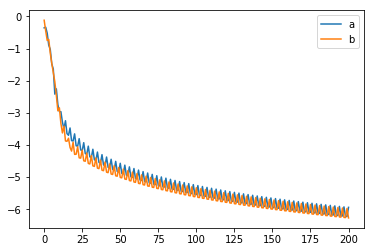

In [2]:
targets = [[.75,.25], [.75,.25], [.5,.5]]
#this is a comment
psi = random_tensor([2,2,2])
phi = random_normal_tensor(targets).reshape(2,2,2)
#print(phi)
a = scaling_distances(psi, targets, 10**(-5))
b = scaling_distances(phi, targets, 10**(-5))
plt.plot(a, label = 'a')
plt.plot(b, label = 'b')
plt.legend()

How about lots of runs, just looking at the time it took to converge?

In [ ]:
runs = 1
n = 10
k=4
#targets = [[.75,.25], [.75,.25], [.6,.4]]
targets = list(scipy.exp(np.random.randn(k*n)).reshape([k,n]))
for i in range(k):
    targets[i]*=(np.sum(targets[i]))**(-1)
uniform=[]
targeted=[]
for i in range(runs):
    psi = random_tensor([n]*k)
    phi = random_normal_tensor(targets).reshape([n]*k)
    uniform.append(len(scaling_distances(psi, targets, 10**(-3), max_iterations=100)))
    targeted.append(len(scaling_distances(phi, targets, 10**(-3), max_iterations=100)))

print("uniform: ", np.average(uniform), " targeted: ", np.average(targeted))
#plt.scatter(uniform,targeted)
#plt.xlabel("uniform")
#plt.ylabel("targeted")
    

In [18]:
targets = np.random.randn(3,n) 
print(targets)

[[ 1.46624202 -0.12554264 -0.71227544 -1.61705742  1.4506689 ]
 [ 0.02200022  0.59028074 -0.73798708 -0.479679   -0.54154394]
 [-1.88819009 -2.1624397  -1.44016119  1.17976157  1.07427811]]


In [19]:
[n]*2

[5, 5]